In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import logins.json file

import json
with open("logins.json", 'r') as json_file:
    login_data = json.load(json_file)

In [3]:
# we have a weird dictionary, convert to a list

logins_list = list(login_data.values())
logins = logins_list[0]
logins

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52',
 '1970-01-01 20:26:05',
 '1970-01-01 20:31:03',
 '1970-01-01 20:34:46',
 '1970-01-01 20:36:34',
 '1970-01-01 20:39:25',
 '1970-01-01 20:40:37',
 '1970-01-01 20:34:58',
 '1970-01-01 20:43:59',
 '1970-01-01 20:47:46',
 '1970-01-01 20:46:34',
 '1970-01-01 20:56:07',
 '1970-01-01 20:49:12',
 '1970-01-01 20:59:06',
 '1970-01-01 20:59:59',
 '1970-01-01 21:15:01',
 '1970-01-01 21:09:24',
 '1970-01-01 21:19:24',
 '1970-01-01 21:20:53',
 '1970-01-01 21:29:19',
 '1970-01-01 21:58:05',
 '1970-01-01 21:51:51',
 '1970-01-01 21:59:40',
 '1970-01-01 22:08:34',
 '1970-01-01 22:02:51',
 '1970-01-01 21:58:32',
 '1970-01-01 22:02:31',
 '1970-01-01 22:05:32',
 '1970-01-01 22:02:46',
 '1970-01-01 22:10:28',
 '1970-01-01 22:11:58',
 '1970-01-01 22:01:05',
 '1970-01-01 22:

In [4]:
# our list contains string objects, convert these to dt

from datetime import datetime

date_format = '%Y-%m-%d %H:%M:%S'

logins_dt = []

for date_str in logins:
    dt = datetime.strptime(date_str, date_format)
    logins_dt.append(dt)
    
logins_dt

[datetime.datetime(1970, 1, 1, 20, 13, 18),
 datetime.datetime(1970, 1, 1, 20, 16, 10),
 datetime.datetime(1970, 1, 1, 20, 16, 37),
 datetime.datetime(1970, 1, 1, 20, 16, 36),
 datetime.datetime(1970, 1, 1, 20, 26, 21),
 datetime.datetime(1970, 1, 1, 20, 21, 41),
 datetime.datetime(1970, 1, 1, 20, 12, 16),
 datetime.datetime(1970, 1, 1, 20, 35, 47),
 datetime.datetime(1970, 1, 1, 20, 35, 38),
 datetime.datetime(1970, 1, 1, 20, 47, 52),
 datetime.datetime(1970, 1, 1, 20, 26, 5),
 datetime.datetime(1970, 1, 1, 20, 31, 3),
 datetime.datetime(1970, 1, 1, 20, 34, 46),
 datetime.datetime(1970, 1, 1, 20, 36, 34),
 datetime.datetime(1970, 1, 1, 20, 39, 25),
 datetime.datetime(1970, 1, 1, 20, 40, 37),
 datetime.datetime(1970, 1, 1, 20, 34, 58),
 datetime.datetime(1970, 1, 1, 20, 43, 59),
 datetime.datetime(1970, 1, 1, 20, 47, 46),
 datetime.datetime(1970, 1, 1, 20, 46, 34),
 datetime.datetime(1970, 1, 1, 20, 56, 7),
 datetime.datetime(1970, 1, 1, 20, 49, 12),
 datetime.datetime(1970, 1, 1, 20, 

In [5]:
# now we want to aggregate by 15 min intervals

from datetime import timedelta 

interval = timedelta(minutes=15)

# Create an empty dictionary to store the counts
interval_counts = {}

# Iterate through the datetime objects
for dt in logins_dt:
    # Calculate the interval start time
    interval_start = dt.replace(second=0, microsecond=0)
    interval_start -= timedelta(minutes=dt.minute % 15)
    
    # Calculate the interval end time
    interval_end = interval_start + interval
    
    # Create a tuple representing the interval
    interval_tuple = (interval_start, interval_end)
    
    # Update the dictionary with the interval count
    interval_counts[interval_tuple] = interval_counts.get(interval_tuple, 0) + 1

# Print the interval counts
for interval, count in interval_counts.items():
    print(f"{interval[0].strftime('%Y-%m-%d %H:%M')}-{interval[1].strftime('%H:%M')} Count: {count}")

1970-01-01 20:00-20:15 Count: 2
1970-01-01 20:15-20:30 Count: 6
1970-01-01 20:30-20:45 Count: 9
1970-01-01 20:45-21:00 Count: 7
1970-01-01 21:15-21:30 Count: 4
1970-01-01 21:00-21:15 Count: 1
1970-01-01 21:45-22:00 Count: 4
1970-01-01 22:00-22:15 Count: 9
1970-01-01 22:15-22:30 Count: 8
1970-01-01 22:30-22:45 Count: 1
1970-01-01 23:00-23:15 Count: 16
1970-01-01 22:45-23:00 Count: 3
1970-01-01 23:15-23:30 Count: 13
1970-01-01 23:30-23:45 Count: 14
1970-01-01 23:45-00:00 Count: 15
1970-01-02 00:00-00:15 Count: 10
1970-01-02 00:15-00:30 Count: 18
1970-01-02 00:30-00:45 Count: 12
1970-01-02 00:45-01:00 Count: 13
1970-01-02 01:00-01:15 Count: 9
1970-01-02 01:15-01:30 Count: 8
1970-01-02 01:30-01:45 Count: 10
1970-01-02 01:45-02:00 Count: 6
1970-01-02 02:00-02:15 Count: 7
1970-01-02 02:15-02:30 Count: 18
1970-01-02 02:30-02:45 Count: 12
1970-01-02 02:45-03:00 Count: 6
1970-01-02 03:00-03:15 Count: 12
1970-01-02 03:15-03:30 Count: 5
1970-01-02 03:30-03:45 Count: 6
1970-01-02 03:45-04:00 Count

1970-01-17 17:30-17:45 Count: 14
1970-01-17 17:45-18:00 Count: 5
1970-01-17 18:00-18:15 Count: 5
1970-01-17 18:15-18:30 Count: 7
1970-01-17 18:30-18:45 Count: 7
1970-01-17 18:45-19:00 Count: 9
1970-01-17 19:00-19:15 Count: 8
1970-01-17 19:15-19:30 Count: 5
1970-01-17 19:30-19:45 Count: 10
1970-01-17 19:45-20:00 Count: 11
1970-01-17 20:00-20:15 Count: 2
1970-01-17 20:15-20:30 Count: 13
1970-01-17 20:30-20:45 Count: 13
1970-01-17 20:45-21:00 Count: 22
1970-01-17 21:00-21:15 Count: 7
1970-01-17 21:15-21:30 Count: 13
1970-01-17 21:30-21:45 Count: 13
1970-01-17 21:45-22:00 Count: 20
1970-01-17 22:00-22:15 Count: 12
1970-01-17 22:15-22:30 Count: 13
1970-01-17 22:30-22:45 Count: 14
1970-01-17 22:45-23:00 Count: 13
1970-01-17 23:00-23:15 Count: 13
1970-01-17 23:15-23:30 Count: 10
1970-01-17 23:30-23:45 Count: 17
1970-01-17 23:45-00:00 Count: 11
1970-01-18 00:00-00:15 Count: 14
1970-01-18 00:15-00:30 Count: 15
1970-01-18 00:30-00:45 Count: 15
1970-01-18 00:45-01:00 Count: 24
1970-01-18 01:00-01

1970-01-31 11:30-11:45 Count: 7
1970-01-31 11:45-12:00 Count: 8
1970-01-31 12:00-12:15 Count: 4
1970-01-31 12:15-12:30 Count: 5
1970-01-31 12:30-12:45 Count: 7
1970-01-31 12:45-13:00 Count: 4
1970-01-31 13:00-13:15 Count: 8
1970-01-31 13:15-13:30 Count: 7
1970-01-31 13:30-13:45 Count: 9
1970-01-31 13:45-14:00 Count: 6
1970-01-31 14:00-14:15 Count: 8
1970-01-31 14:15-14:30 Count: 8
1970-01-31 14:30-14:45 Count: 7
1970-01-31 14:45-15:00 Count: 6
1970-01-31 15:00-15:15 Count: 5
1970-01-31 15:15-15:30 Count: 6
1970-01-31 15:30-15:45 Count: 9
1970-01-31 15:45-16:00 Count: 9
1970-01-31 16:00-16:15 Count: 2
1970-01-31 16:15-16:30 Count: 6
1970-01-31 16:30-16:45 Count: 15
1970-01-31 17:00-17:15 Count: 5
1970-01-31 16:45-17:00 Count: 7
1970-01-31 17:15-17:30 Count: 10
1970-01-31 17:30-17:45 Count: 5
1970-01-31 17:45-18:00 Count: 9
1970-01-31 18:00-18:15 Count: 4
1970-01-31 18:15-18:30 Count: 6
1970-01-31 18:30-18:45 Count: 5
1970-01-31 18:45-19:00 Count: 10
1970-01-31 19:00-19:15 Count: 8
1970-

1970-02-14 05:30-05:45 Count: 25
1970-02-14 05:45-06:00 Count: 8
1970-02-14 06:00-06:15 Count: 6
1970-02-14 06:15-06:30 Count: 4
1970-02-14 06:30-06:45 Count: 2
1970-02-14 06:45-07:00 Count: 3
1970-02-14 07:00-07:15 Count: 3
1970-02-14 07:15-07:30 Count: 1
1970-02-14 07:30-07:45 Count: 1
1970-02-14 07:45-08:00 Count: 3
1970-02-14 08:00-08:15 Count: 4
1970-02-14 08:15-08:30 Count: 1
1970-02-14 09:15-09:30 Count: 1
1970-02-14 09:00-09:15 Count: 2
1970-02-14 09:30-09:45 Count: 3
1970-02-14 09:45-10:00 Count: 1
1970-02-14 10:00-10:15 Count: 3
1970-02-14 10:15-10:30 Count: 3
1970-02-14 10:30-10:45 Count: 2
1970-02-14 10:45-11:00 Count: 4
1970-02-14 11:00-11:15 Count: 2
1970-02-14 11:15-11:30 Count: 3
1970-02-14 11:30-11:45 Count: 6
1970-02-14 11:45-12:00 Count: 10
1970-02-14 12:00-12:15 Count: 4
1970-02-14 12:15-12:30 Count: 6
1970-02-14 12:30-12:45 Count: 5
1970-02-14 12:45-13:00 Count: 15
1970-02-14 13:00-13:15 Count: 6
1970-02-14 13:15-13:30 Count: 7
1970-02-14 13:30-13:45 Count: 14
1970

1970-02-25 03:00-03:15 Count: 6
1970-02-25 03:15-03:30 Count: 8
1970-02-25 03:30-03:45 Count: 4
1970-02-25 03:45-04:00 Count: 2
1970-02-25 04:00-04:15 Count: 5
1970-02-25 04:15-04:30 Count: 3
1970-02-25 04:30-04:45 Count: 2
1970-02-25 04:45-05:00 Count: 7
1970-02-25 05:00-05:15 Count: 3
1970-02-25 05:15-05:30 Count: 1
1970-02-25 05:30-05:45 Count: 2
1970-02-25 06:15-06:30 Count: 1
1970-02-25 07:00-07:15 Count: 2
1970-02-25 07:15-07:30 Count: 2
1970-02-25 07:30-07:45 Count: 2
1970-02-25 08:00-08:15 Count: 2
1970-02-25 08:15-08:30 Count: 2
1970-02-25 08:30-08:45 Count: 2
1970-02-25 08:45-09:00 Count: 1
1970-02-25 09:00-09:15 Count: 5
1970-02-25 09:15-09:30 Count: 3
1970-02-25 09:30-09:45 Count: 1
1970-02-25 09:45-10:00 Count: 7
1970-02-25 10:00-10:15 Count: 9
1970-02-25 10:15-10:30 Count: 15
1970-02-25 10:30-10:45 Count: 7
1970-02-25 10:45-11:00 Count: 12
1970-02-25 11:00-11:15 Count: 17
1970-02-25 11:15-11:30 Count: 10
1970-02-25 11:30-11:45 Count: 26
1970-02-25 11:45-12:00 Count: 18
19

1970-03-08 01:00-01:15 Count: 24
1970-03-08 01:15-01:30 Count: 25
1970-03-08 01:30-01:45 Count: 24
1970-03-08 01:45-02:00 Count: 27
1970-03-08 02:00-02:15 Count: 35
1970-03-08 02:15-02:30 Count: 38
1970-03-08 02:30-02:45 Count: 27
1970-03-08 02:45-03:00 Count: 33
1970-03-08 03:00-03:15 Count: 25
1970-03-08 03:15-03:30 Count: 30
1970-03-08 03:30-03:45 Count: 38
1970-03-08 03:45-04:00 Count: 23
1970-03-08 04:00-04:15 Count: 35
1970-03-08 04:15-04:30 Count: 30
1970-03-08 04:30-04:45 Count: 43
1970-03-08 04:45-05:00 Count: 51
1970-03-08 05:00-05:15 Count: 47
1970-03-08 05:15-05:30 Count: 31
1970-03-08 05:30-05:45 Count: 21
1970-03-08 05:45-06:00 Count: 12
1970-03-08 06:00-06:15 Count: 9
1970-03-08 06:15-06:30 Count: 8
1970-03-08 06:30-06:45 Count: 7
1970-03-08 06:45-07:00 Count: 5
1970-03-08 07:00-07:15 Count: 5
1970-03-08 07:15-07:30 Count: 4
1970-03-08 07:30-07:45 Count: 2
1970-03-08 07:45-08:00 Count: 2
1970-03-08 08:00-08:15 Count: 5
1970-03-08 08:15-08:30 Count: 1
1970-03-08 08:30-08:

1970-03-19 12:30-12:45 Count: 25
1970-03-19 12:45-13:00 Count: 13
1970-03-19 13:00-13:15 Count: 11
1970-03-19 13:15-13:30 Count: 11
1970-03-19 13:30-13:45 Count: 10
1970-03-19 13:45-14:00 Count: 15
1970-03-19 14:00-14:15 Count: 10
1970-03-19 14:15-14:30 Count: 13
1970-03-19 14:30-14:45 Count: 17
1970-03-19 14:45-15:00 Count: 12
1970-03-19 15:00-15:15 Count: 17
1970-03-19 15:15-15:30 Count: 10
1970-03-19 15:30-15:45 Count: 9
1970-03-19 15:45-16:00 Count: 7
1970-03-19 16:00-16:15 Count: 7
1970-03-19 16:15-16:30 Count: 9
1970-03-19 16:30-16:45 Count: 16
1970-03-19 16:45-17:00 Count: 5
1970-03-19 17:00-17:15 Count: 14
1970-03-19 17:15-17:30 Count: 9
1970-03-19 17:30-17:45 Count: 14
1970-03-19 17:45-18:00 Count: 15
1970-03-19 18:00-18:15 Count: 13
1970-03-19 18:15-18:30 Count: 10
1970-03-19 18:30-18:45 Count: 21
1970-03-19 18:45-19:00 Count: 12
1970-03-19 19:00-19:15 Count: 17
1970-03-19 19:15-19:30 Count: 11
1970-03-19 19:30-19:45 Count: 16
1970-03-19 19:45-20:00 Count: 13
1970-03-19 20:00

1970-04-02 06:15-06:30 Count: 6
1970-04-02 06:30-06:45 Count: 2
1970-04-02 06:45-07:00 Count: 2
1970-04-02 07:00-07:15 Count: 2
1970-04-02 07:15-07:30 Count: 2
1970-04-02 07:30-07:45 Count: 2
1970-04-02 07:45-08:00 Count: 4
1970-04-02 08:15-08:30 Count: 2
1970-04-02 08:30-08:45 Count: 2
1970-04-02 08:45-09:00 Count: 2
1970-04-02 09:00-09:15 Count: 1
1970-04-02 09:15-09:30 Count: 6
1970-04-02 09:30-09:45 Count: 5
1970-04-02 09:45-10:00 Count: 5
1970-04-02 10:00-10:15 Count: 6
1970-04-02 10:15-10:30 Count: 11
1970-04-02 10:30-10:45 Count: 14
1970-04-02 10:45-11:00 Count: 14
1970-04-02 11:00-11:15 Count: 23
1970-04-02 11:15-11:30 Count: 35
1970-04-02 11:30-11:45 Count: 33
1970-04-02 11:45-12:00 Count: 20
1970-04-02 12:00-12:15 Count: 22
1970-04-02 12:15-12:30 Count: 15
1970-04-02 12:30-12:45 Count: 14
1970-04-02 12:45-13:00 Count: 19
1970-04-02 13:00-13:15 Count: 17
1970-04-02 13:15-13:30 Count: 6
1970-04-02 13:30-13:45 Count: 8
1970-04-02 13:45-14:00 Count: 6
1970-04-02 14:00-14:15 Count

In [6]:
# here's the resulting dictionary

interval_counts

{(datetime.datetime(1970, 1, 1, 20, 0),
  datetime.datetime(1970, 1, 1, 20, 15)): 2,
 (datetime.datetime(1970, 1, 1, 20, 15),
  datetime.datetime(1970, 1, 1, 20, 30)): 6,
 (datetime.datetime(1970, 1, 1, 20, 30),
  datetime.datetime(1970, 1, 1, 20, 45)): 9,
 (datetime.datetime(1970, 1, 1, 20, 45),
  datetime.datetime(1970, 1, 1, 21, 0)): 7,
 (datetime.datetime(1970, 1, 1, 21, 15),
  datetime.datetime(1970, 1, 1, 21, 30)): 4,
 (datetime.datetime(1970, 1, 1, 21, 0),
  datetime.datetime(1970, 1, 1, 21, 15)): 1,
 (datetime.datetime(1970, 1, 1, 21, 45),
  datetime.datetime(1970, 1, 1, 22, 0)): 4,
 (datetime.datetime(1970, 1, 1, 22, 0),
  datetime.datetime(1970, 1, 1, 22, 15)): 9,
 (datetime.datetime(1970, 1, 1, 22, 15),
  datetime.datetime(1970, 1, 1, 22, 30)): 8,
 (datetime.datetime(1970, 1, 1, 22, 30),
  datetime.datetime(1970, 1, 1, 22, 45)): 1,
 (datetime.datetime(1970, 1, 1, 23, 0),
  datetime.datetime(1970, 1, 1, 23, 15)): 16,
 (datetime.datetime(1970, 1, 1, 22, 45),
  datetime.datetim

In [7]:
# let's make a nested dictionary 
# the first outer dictionary has DATES as its key
# the second inner dictionary has TIMES as its key, and COUNTS as its item

from collections import defaultdict

nested_dates = defaultdict(dict)

for (start_time, end_time), count in interval_counts.items():
    date = start_time.date()
    time_range = (start_time.time(), end_time.time())
    
    # Check if the date already exists in the outer dictionary
    if date not in nested_dates:
        nested_dates[date] = {}
    
    # Add the time range and count to the inner dictionary
    nested_dates[date][time_range] = count

nested_dates

defaultdict(dict,
            {datetime.date(1970, 1, 1): {(datetime.time(20, 0),
               datetime.time(20, 15)): 2,
              (datetime.time(20, 15), datetime.time(20, 30)): 6,
              (datetime.time(20, 30), datetime.time(20, 45)): 9,
              (datetime.time(20, 45), datetime.time(21, 0)): 7,
              (datetime.time(21, 15), datetime.time(21, 30)): 4,
              (datetime.time(21, 0), datetime.time(21, 15)): 1,
              (datetime.time(21, 45), datetime.time(22, 0)): 4,
              (datetime.time(22, 0), datetime.time(22, 15)): 9,
              (datetime.time(22, 15), datetime.time(22, 30)): 8,
              (datetime.time(22, 30), datetime.time(22, 45)): 1,
              (datetime.time(23, 0), datetime.time(23, 15)): 16,
              (datetime.time(22, 45), datetime.time(23, 0)): 3,
              (datetime.time(23, 15), datetime.time(23, 30)): 13,
              (datetime.time(23, 30), datetime.time(23, 45)): 14,
              (datetime.time(23, 4

In [8]:
# make a list to access each of the dates
date_list = list(nested_dates.keys())

# now I can use the list to access each date, like so
nested_dates[date_list[1]]

{(datetime.time(0, 0), datetime.time(0, 15)): 10,
 (datetime.time(0, 15), datetime.time(0, 30)): 18,
 (datetime.time(0, 30), datetime.time(0, 45)): 12,
 (datetime.time(0, 45), datetime.time(1, 0)): 13,
 (datetime.time(1, 0), datetime.time(1, 15)): 9,
 (datetime.time(1, 15), datetime.time(1, 30)): 8,
 (datetime.time(1, 30), datetime.time(1, 45)): 10,
 (datetime.time(1, 45), datetime.time(2, 0)): 6,
 (datetime.time(2, 0), datetime.time(2, 15)): 7,
 (datetime.time(2, 15), datetime.time(2, 30)): 18,
 (datetime.time(2, 30), datetime.time(2, 45)): 12,
 (datetime.time(2, 45), datetime.time(3, 0)): 6,
 (datetime.time(3, 0), datetime.time(3, 15)): 12,
 (datetime.time(3, 15), datetime.time(3, 30)): 5,
 (datetime.time(3, 30), datetime.time(3, 45)): 6,
 (datetime.time(3, 45), datetime.time(4, 0)): 5,
 (datetime.time(4, 0), datetime.time(4, 15)): 2,
 (datetime.time(4, 30), datetime.time(4, 45)): 5,
 (datetime.time(4, 45), datetime.time(5, 0)): 2,
 (datetime.time(5, 0), datetime.time(5, 15)): 5,
 (d

In [9]:
len(date_list)

103

In [10]:
# let's take one date (1970, 1, 2) and try plotting it
# first let's make it into two lists:
# time (15 min intervals) and counts (# logins per 15 min interval)
intervals_1_2 = []
counts_1_2 = []

for interval, count in nested_dates[date_list[1]].items():
    intervals_1_2.append(interval[0].strftime('%H:%M')) 
    counts_1_2.append(count)

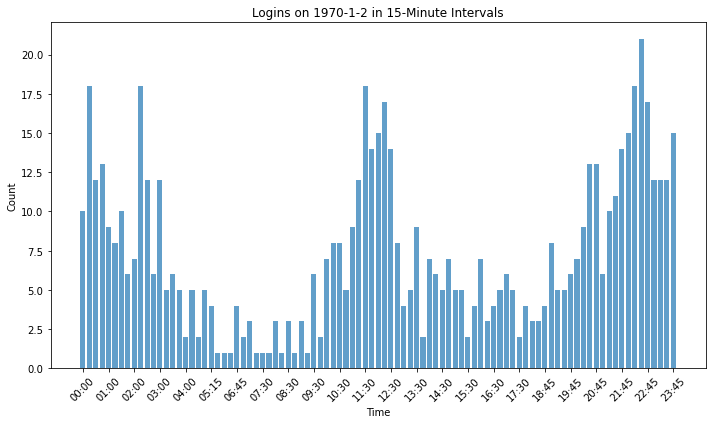

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(intervals_1_2, counts_1_2, align='center', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Logins on 1970-1-2 in 15-Minute Intervals')
plt.xticks(intervals_1_2[::4], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# let's try another

print(date_list[53])

1970-02-23


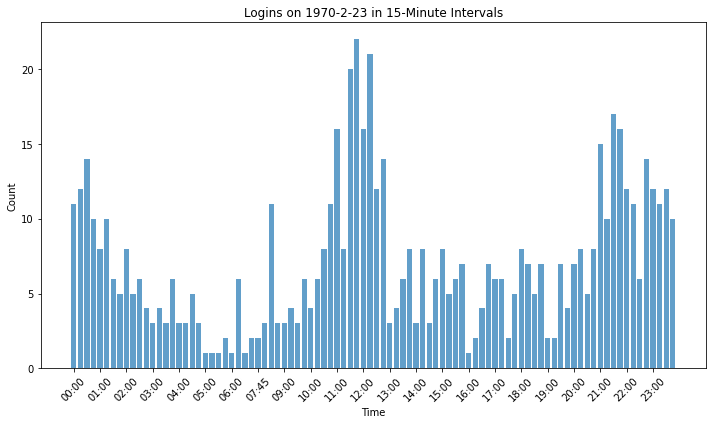

In [13]:
intervals_2_23 = []
counts_2_23 = []

for interval, count in nested_dates[date_list[53]].items():
    intervals_2_23.append(interval[0].strftime('%H:%M')) 
    counts_2_23.append(count)
    
plt.figure(figsize=(10, 6))
plt.bar(intervals_2_23, counts_2_23, align='center', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Logins on 1970-2-23 in 15-Minute Intervals')
plt.xticks(intervals_2_23[::4], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# let's try another

print(date_list[100])

1970-04-11


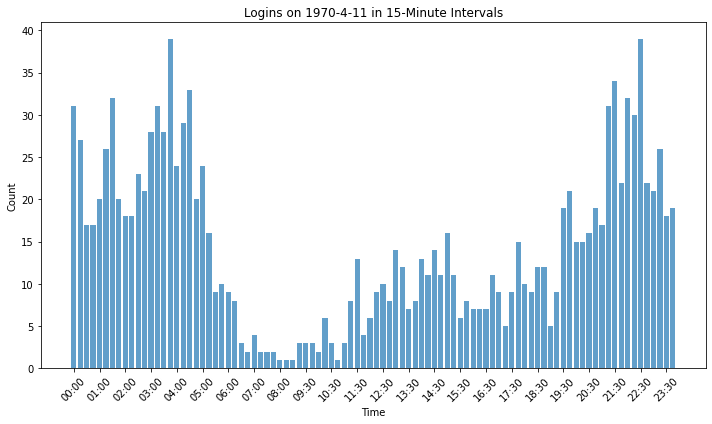

In [15]:
intervals_4_11 = []
counts_4_11 = []

for interval, count in nested_dates[date_list[100]].items():
    intervals_4_11.append(interval[0].strftime('%H:%M')) 
    counts_4_11.append(count)
    
plt.figure(figsize=(10, 6))
plt.bar(intervals_4_11, counts_4_11, align='center', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Logins on 1970-4-11 in 15-Minute Intervals')
plt.xticks(intervals_4_11[::4], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# what if we try to aggregate the *average logins*
# for each 15 min interval?

In [17]:
# let's first create a dictionary object
# with 15 min time intervals

# Specify the start time and end time for the day
start_time = datetime(1970, 1, 1, 0, 0)  # Start at midnight
end_time = datetime(1970, 1, 1, 23, 59)   # End just before midnight

# Specify the time interval (15 minutes)
interval = timedelta(minutes=15)

# Initialize an empty dictionary to store the time intervals
interval_day = {}

# Create a loop to generate datetime objects for each 15-minute interval
current_time = start_time
while current_time <= end_time:
    # Calculate the end time of the interval
    end_of_interval = current_time + interval

    # Create a key for the dictionary using the time interval
    interval_key = (current_time.time(), end_of_interval.time())

    # Add the interval to the dictionary with a None value (or you can set a default value)
    interval_day[interval_key] = 0

    # Move to the next interval
    current_time = end_of_interval

interval_day

{(datetime.time(0, 0), datetime.time(0, 15)): 0,
 (datetime.time(0, 15), datetime.time(0, 30)): 0,
 (datetime.time(0, 30), datetime.time(0, 45)): 0,
 (datetime.time(0, 45), datetime.time(1, 0)): 0,
 (datetime.time(1, 0), datetime.time(1, 15)): 0,
 (datetime.time(1, 15), datetime.time(1, 30)): 0,
 (datetime.time(1, 30), datetime.time(1, 45)): 0,
 (datetime.time(1, 45), datetime.time(2, 0)): 0,
 (datetime.time(2, 0), datetime.time(2, 15)): 0,
 (datetime.time(2, 15), datetime.time(2, 30)): 0,
 (datetime.time(2, 30), datetime.time(2, 45)): 0,
 (datetime.time(2, 45), datetime.time(3, 0)): 0,
 (datetime.time(3, 0), datetime.time(3, 15)): 0,
 (datetime.time(3, 15), datetime.time(3, 30)): 0,
 (datetime.time(3, 30), datetime.time(3, 45)): 0,
 (datetime.time(3, 45), datetime.time(4, 0)): 0,
 (datetime.time(4, 0), datetime.time(4, 15)): 0,
 (datetime.time(4, 15), datetime.time(4, 30)): 0,
 (datetime.time(4, 30), datetime.time(4, 45)): 0,
 (datetime.time(4, 45), datetime.time(5, 0)): 0,
 (datetime

In [18]:
# Initialize dictionaries to store sum of counts and date count for each time interval
sum_counts = interval_day.copy()
date_counts = interval_day.copy()

# Iterate through the outer dictionary (dates)
for date, inner_dict in nested_dates.items():
    # Iterate through the inner dictionary (times and counts)
    for time_interval, count in inner_dict.items():
        # Update the sum of counts and date count for the time interval
        sum_counts[time_interval] += count
        date_counts[time_interval] += 1
        
# Calculate the average counts for each time interval
average_counts = {}
for time_interval, sum_count in sum_counts.items():
    num_dates = date_counts[time_interval]
    average_counts[time_interval] = sum_count / num_dates

average_counts

{(datetime.time(0, 0), datetime.time(0, 15)): 14.107843137254902,
 (datetime.time(0, 15), datetime.time(0, 30)): 15.166666666666666,
 (datetime.time(0, 30), datetime.time(0, 45)): 14.950980392156863,
 (datetime.time(0, 45), datetime.time(1, 0)): 14.529411764705882,
 (datetime.time(1, 0), datetime.time(1, 15)): 15.186274509803921,
 (datetime.time(1, 15), datetime.time(1, 30)): 15.666666666666666,
 (datetime.time(1, 30), datetime.time(1, 45)): 16.401960784313726,
 (datetime.time(1, 45), datetime.time(2, 0)): 14.676470588235293,
 (datetime.time(2, 0), datetime.time(2, 15)): 14.94059405940594,
 (datetime.time(2, 15), datetime.time(2, 30)): 14.96078431372549,
 (datetime.time(2, 30), datetime.time(2, 45)): 14.148514851485148,
 (datetime.time(2, 45), datetime.time(3, 0)): 13.36,
 (datetime.time(3, 0), datetime.time(3, 15)): 12.5,
 (datetime.time(3, 15), datetime.time(3, 30)): 12.764705882352942,
 (datetime.time(3, 30), datetime.time(3, 45)): 11.857142857142858,
 (datetime.time(3, 45), datetim

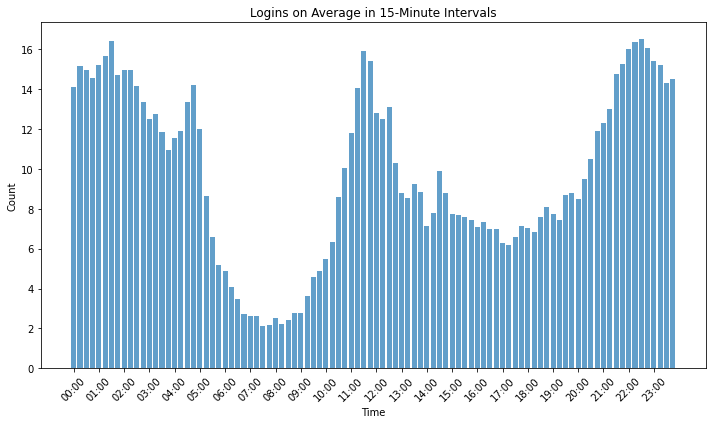

In [19]:
intervals_avg = []
counts_avg = []

for interval, count in average_counts.items():
    intervals_avg.append(interval[0].strftime('%H:%M')) 
    counts_avg.append(count)
    
plt.figure(figsize=(10, 6))
plt.bar(intervals_avg, counts_avg, align='center', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Logins on Average in 15-Minute Intervals')
plt.xticks(intervals_avg[::4], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# also, we know that we have 103 "days"
# but we don't have logins for all the 15-min increments of every day

date_counts

{(datetime.time(0, 0), datetime.time(0, 15)): 102,
 (datetime.time(0, 15), datetime.time(0, 30)): 102,
 (datetime.time(0, 30), datetime.time(0, 45)): 102,
 (datetime.time(0, 45), datetime.time(1, 0)): 102,
 (datetime.time(1, 0), datetime.time(1, 15)): 102,
 (datetime.time(1, 15), datetime.time(1, 30)): 102,
 (datetime.time(1, 30), datetime.time(1, 45)): 102,
 (datetime.time(1, 45), datetime.time(2, 0)): 102,
 (datetime.time(2, 0), datetime.time(2, 15)): 101,
 (datetime.time(2, 15), datetime.time(2, 30)): 102,
 (datetime.time(2, 30), datetime.time(2, 45)): 101,
 (datetime.time(2, 45), datetime.time(3, 0)): 100,
 (datetime.time(3, 0), datetime.time(3, 15)): 102,
 (datetime.time(3, 15), datetime.time(3, 30)): 102,
 (datetime.time(3, 30), datetime.time(3, 45)): 98,
 (datetime.time(3, 45), datetime.time(4, 0)): 100,
 (datetime.time(4, 0), datetime.time(4, 15)): 98,
 (datetime.time(4, 15), datetime.time(4, 30)): 98,
 (datetime.time(4, 30), datetime.time(4, 45)): 100,
 (datetime.time(4, 45), 

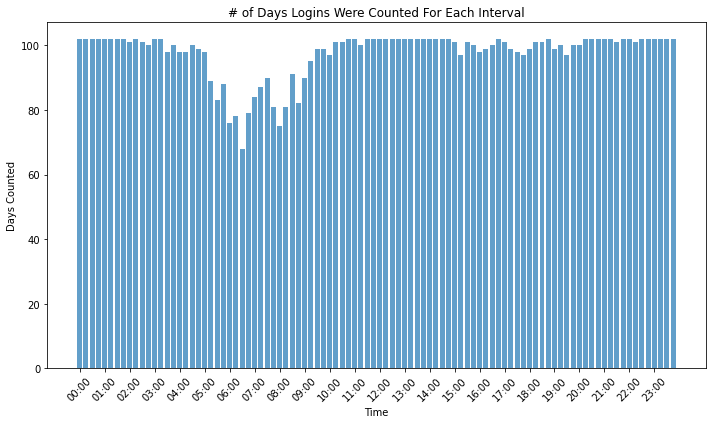

In [21]:
intervals = []
counts_tot = []

for interval, count in date_counts.items():
    intervals.append(interval[0].strftime('%H:%M')) 
    counts_tot.append(count)
    
plt.figure(figsize=(10, 6))
plt.bar(intervals, counts_tot, align='center', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Days Counted')
plt.title('# of Days Logins Were Counted For Each Interval')
plt.xticks(intervals_avg[::4], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# In summary

As far as data quality: it seems like there are fewer logins recorded during 5am and 9am, which coincides with lower counts between 6am-9am. We would have to check if this is a tech issue preventing productive logins or simply the reality that users aren't logging in during this time.

We have a trimodal or perhaps bimodal distribution. Logins are high in the wee early hours, take a big dip between 6am-9am, are high again around midday, lower but not quite as low between 1pm-8pm, and then are high through midnight. 

Over time: These numbers shift a little bit over time, e.g. there are almost twice as many logins in April as in January. But the overall shape of the distribution remains the same.